In [1]:
from zipline.api import order_target_percent, record, symbol, set_benchmark
from zipline import run_algorithm
import warnings
import pyfolio as pf
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

STOCKS = ['AMD', 'CERN', 'COST', 'DELL', 'GPS', 'INTC', 'MMM']


def initialize(algo):
    algo.stocks = STOCKS
    algo.symbol_ids = [algo.symbol(asset) for asset in STOCKS]


def make_weights(algo, data):
    recent = data.history(assets=algo.symbol_ids, fields='close', bar_count=60, frequency='1d')
    short_mean = recent[-10:].mean()
    long_mean = recent[-50:].mean()
    weights = (short_mean - long_mean) / long_mean
    norm_weights = weights / weights.abs().sum()
    return norm_weights


def handle_data(algo, data):
    weights = make_weights(algo, data)
    for security in algo.symbol_ids:
        order_target_percent(security, weights[security])


start = pd.Timestamp('2016-1-1', tz='utc')
end = pd.Timestamp('2017-1-1', tz='utc')
results = run_algorithm(start=start, end=end, capital_base=1000, initialize=initialize, handle_data=handle_data)
# print(results.columns)
# results.to_csv("backtest.csv")
returns, positions, orders = pf.utils.extract_rets_pos_txn_from_zipline(results)




Start date,2016-01-04
End date,2016-12-30
Total months,12
,Backtest
Annual return,15.0%
Cumulative returns,15.0%
Annual volatility,34.5%
Sharpe ratio,0.57
Calmar ratio,0.66
Stability,0.50
Max drawdown,-22.8%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,22.76,2016-01-04,2016-04-19,2016-06-17,120
1,22.29,2016-08-23,2016-10-24,NaT,NaN
2,9.22,2016-06-21,2016-06-27,2016-07-18,20
3,5.27,2016-07-26,2016-08-02,2016-08-15,15
4,2.21,2016-06-17,2016-06-20,2016-06-21,3


Stress Events,mean,min,max
New Normal,0.08%,-6.91%,16.38%


Top 10 long positions of all time,max
sid,
AMD,70.36%
GPS,41.26%
INTC,23.01%
MMM,21.97%
CERN,17.10%


Top 10 short positions of all time,max
sid,
GPS,-48.68%
AMD,-44.11%
COST,-43.20%
CERN,-41.18%
INTC,-24.73%
MMM,-18.36%


Top 10 positions of all time,max
sid,
AMD,70.36%
GPS,48.68%
COST,43.20%
CERN,41.18%
INTC,24.73%
MMM,21.97%


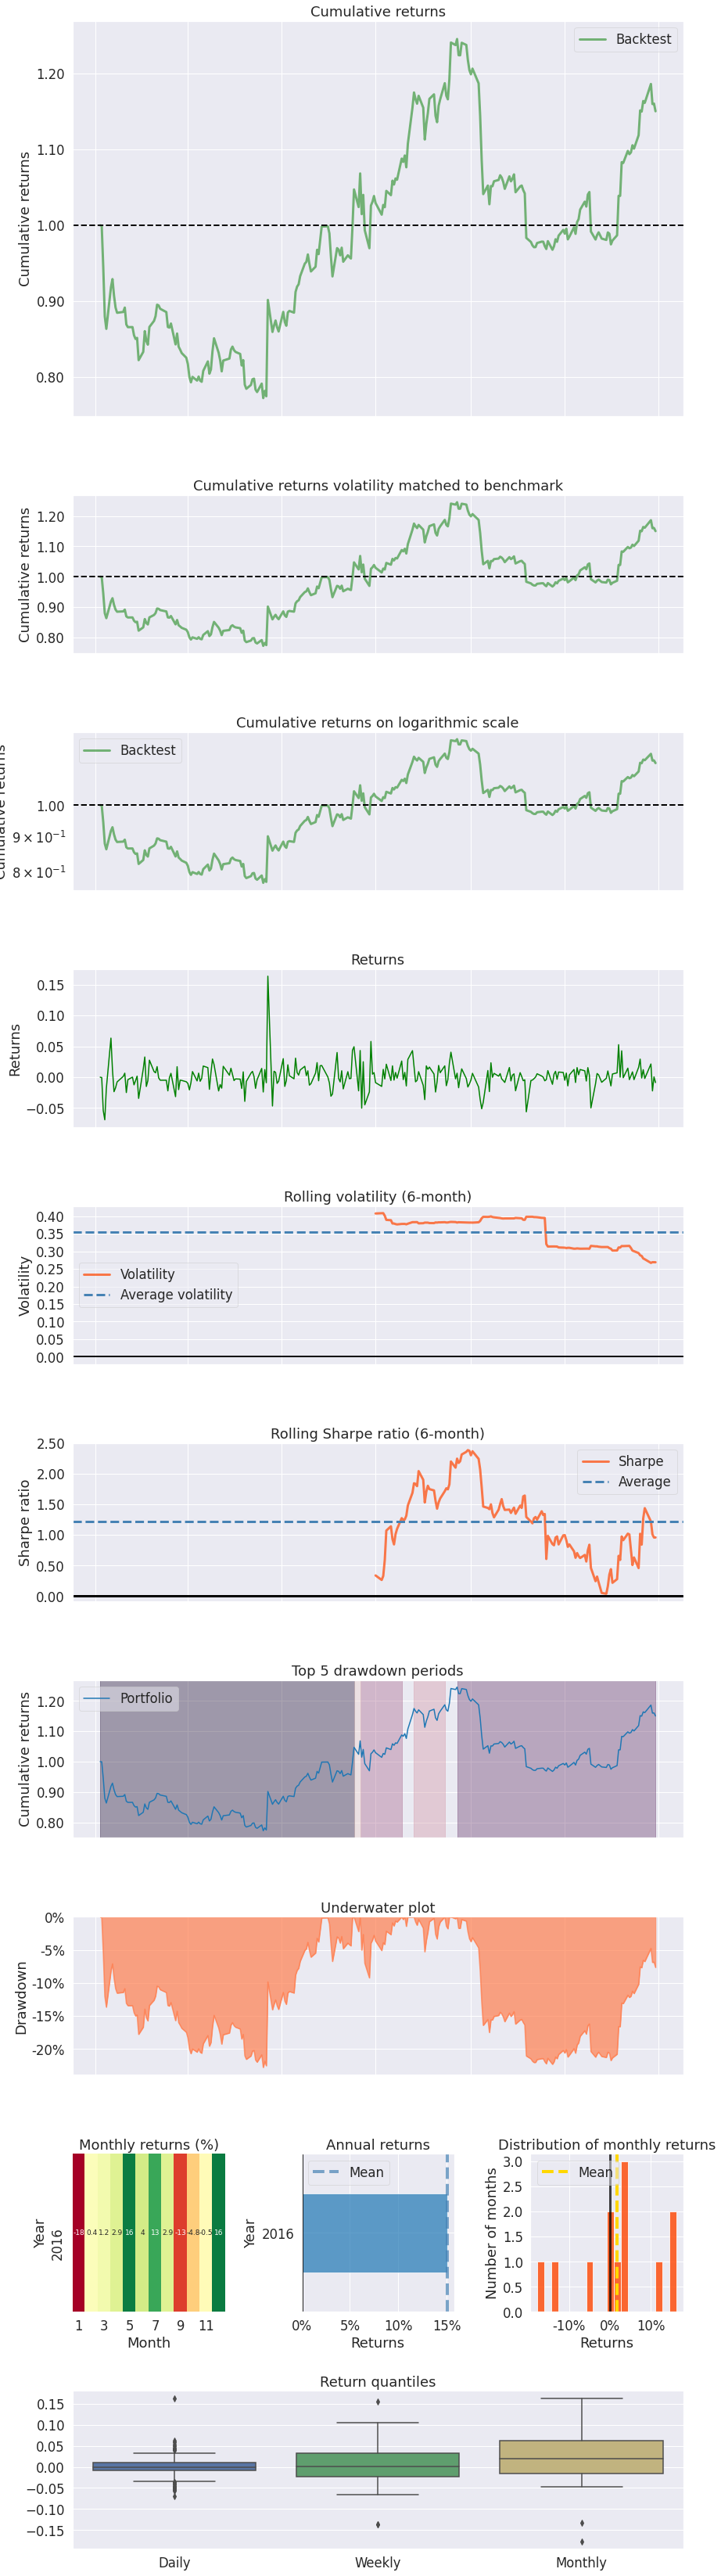

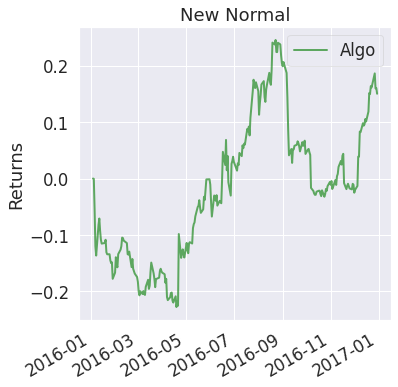

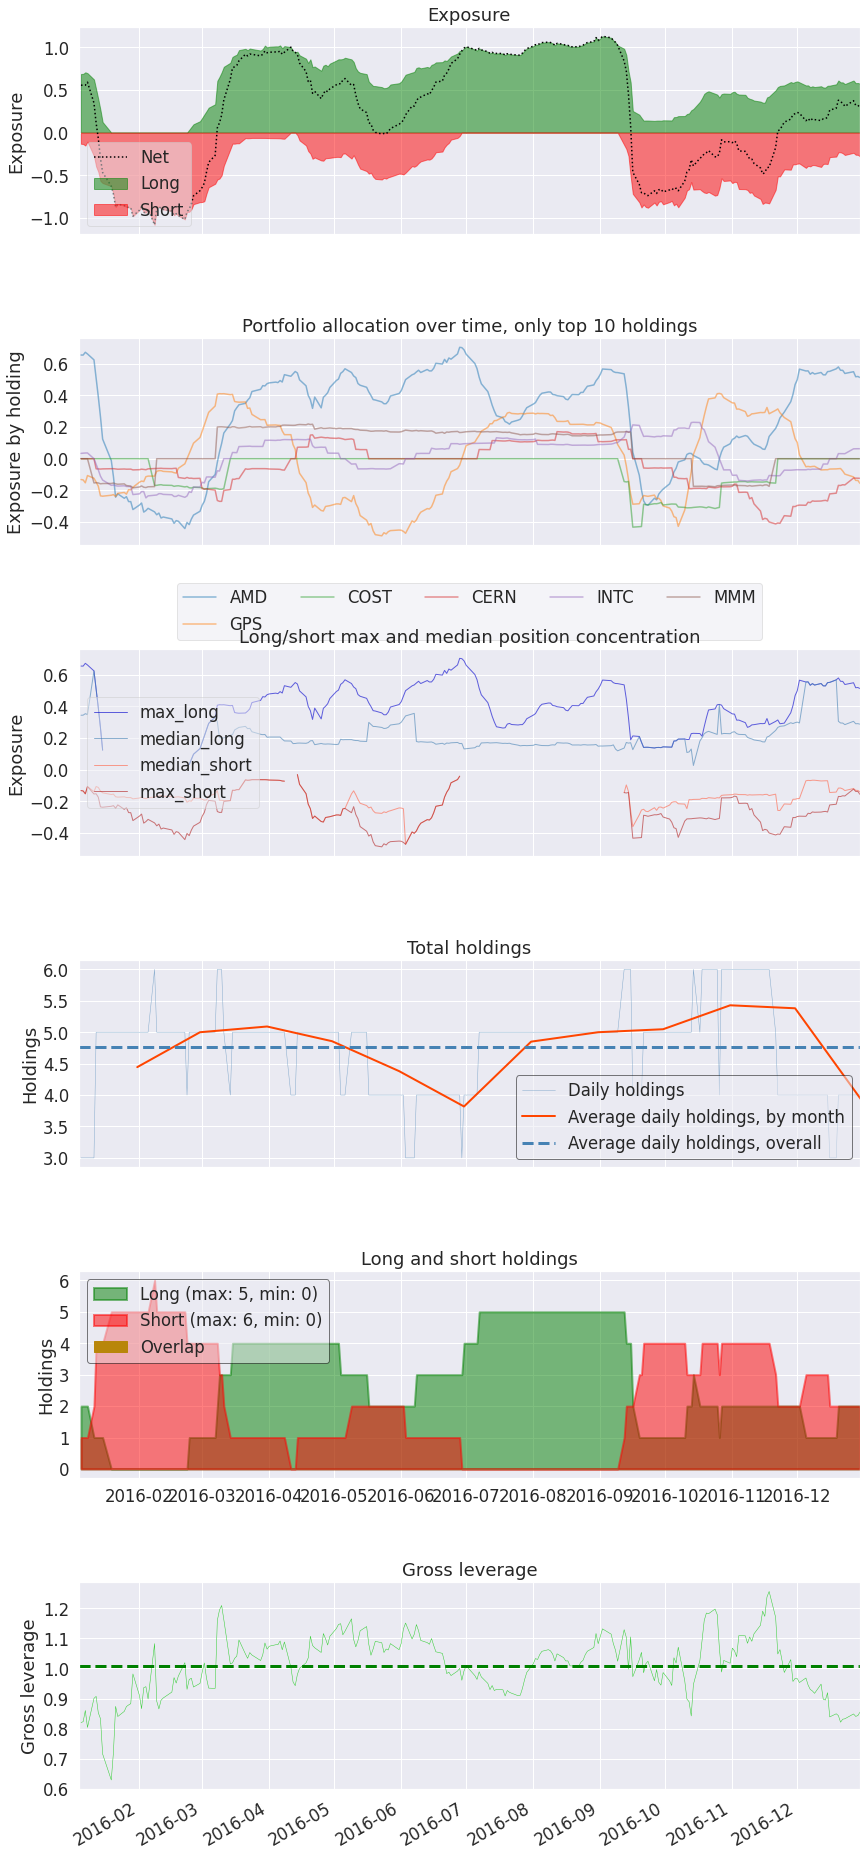

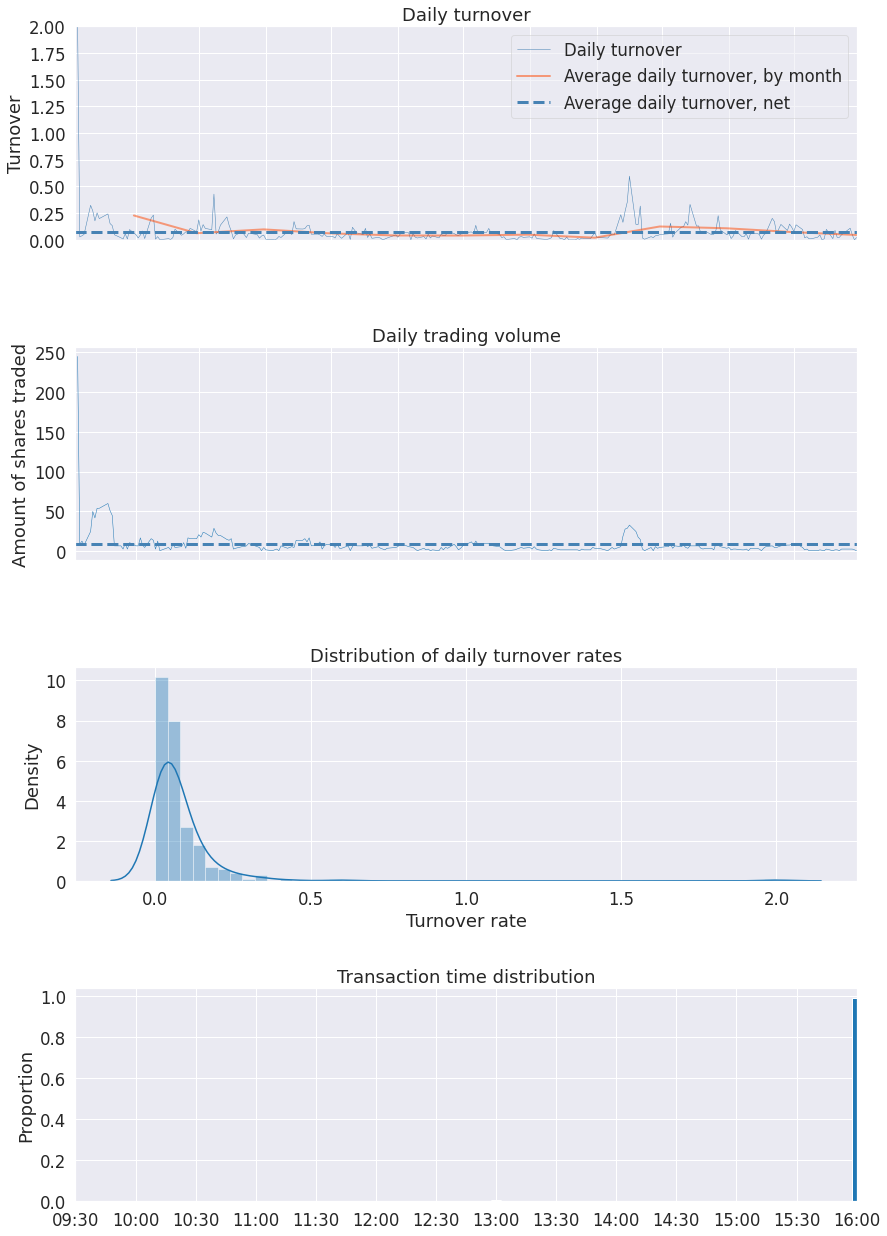

In [4]:
pf.create_full_tear_sheet(returns=returns, positions=positions, transactions=orders)
# we won't get the nice tables if we only run the algo in an ide, so testing in Jupyter Notebooks works
# quite nicely after you build your algo.




In [5]:
def plot_returns():
    pf.plot_rolling_returns(returns)  # instantiates plot, basically plt.plot(returns)
    plt.xlabel("Date")
    plt.ylabel("Returns")
    plt.savefig("returns")
    plt.show()


def plot_positions_tear_sheet():
    pf.create_position_tear_sheet(returns=returns, positions=positions)
    plt.xlabel("Date")
    plt.savefig("positions")
    plt.show()


def plot_drawdown():
    pf.plot_drawdown_periods(returns=returns, top=5)
    plt.xlabel("Date")
    plt.savefig("drawdown")
    plt.show()


def plot_tear_sheet():
    pf.create_full_tear_sheet(returns, positions=positions, transactions=orders)
    plt.savefig("full_tear_sheet")

